In [1]:
%load_ext autoreload
%autoreload 2

In [85]:
import timeit
from social_optimum import find_social_optimum
from loading_utils import create_graph
from loading_utils import load_matrix_from_csv
from network import create_graph_from_matrices
import numpy as np
from visualize import visualize_network
from create_network import create_single_path_matrix, create_two_path_matrix
from performance import gather_performance_data, gather_performance_data_all, fit_models_and_calculate_r2
import matplotlib.pyplot as plt
import pandas as pd

# Visualize Matrix Creation Methods

## Single path matrix

In [24]:
n_nodes = 5
single_path_matrix = create_single_path_matrix(n_nodes)
single_path_matrix

array([[0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0]])

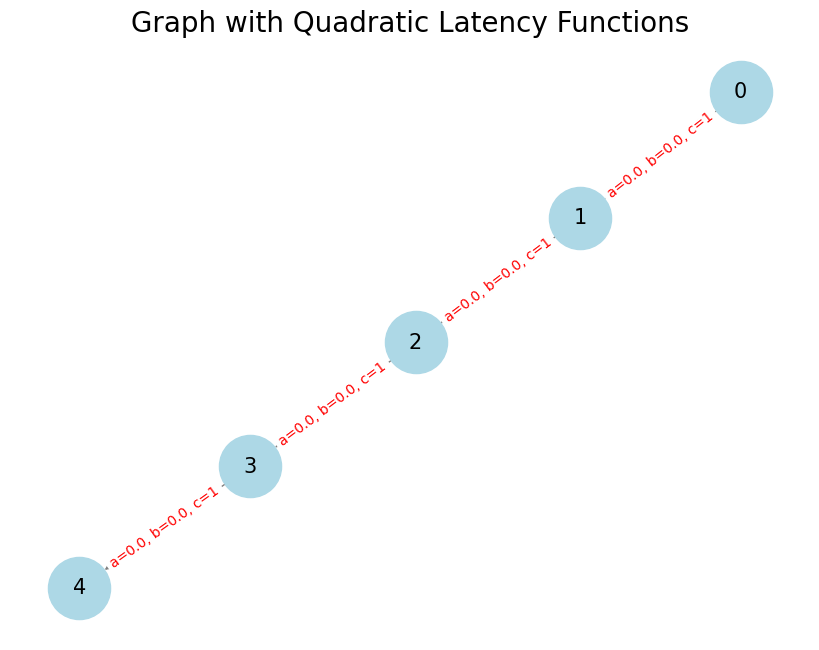

In [27]:
visualize_network(create_graph_from_matrices(np.zeros((n_nodes, n_nodes)), np.zeros((n_nodes, n_nodes)), single_path_matrix))

## Two path matrix

In [30]:
n_nodes = 6
two_path_matrix = create_two_path_matrix(top_edges=3, bottom_edges=3)
two_path_matrix

array([[0, 1, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0]])

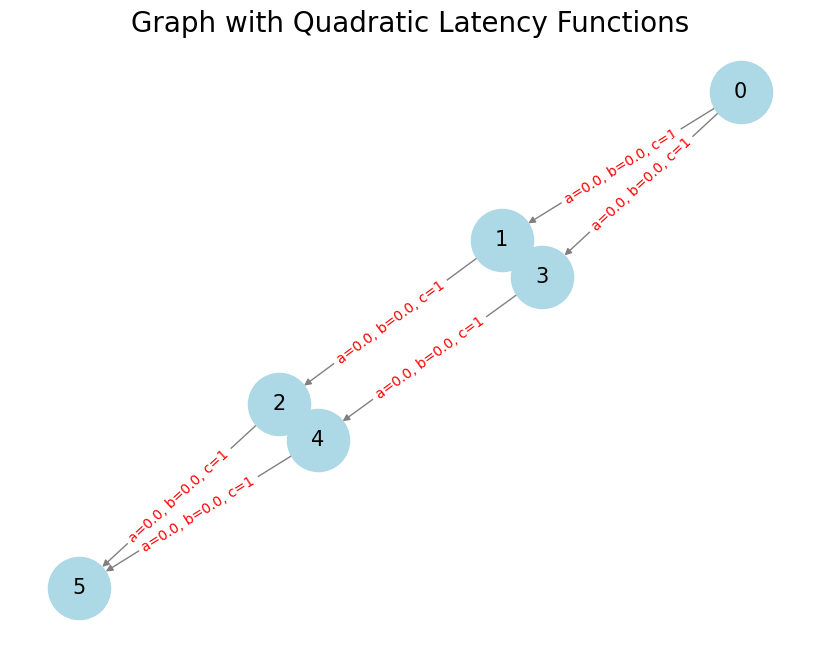

In [31]:
visualize_network(create_graph_from_matrices(np.zeros((n_nodes, n_nodes)), np.zeros((n_nodes, n_nodes)), two_path_matrix))

# Gather Performance Data

## Sample networks

In [52]:
graph_paths = [f"../data/network{i}/" for i in range(1, 7)]

In [53]:
graphs_list = [create_graph(path) for path in graph_paths]

In [ ]:
results_sample_networks, raw_times_sample_network = gather_performance_data_all(graphs_list)

## Single Path Networks

The coeficient randomization is applied

In [37]:
single_path_graphs = []
for i in range(3, 12):
    matrices = [create_single_path_matrix(i, True).tolist() for _ in range(3)]
    graph = create_graph_from_matrices(matrices[0], matrices[1], matrices[2])
    single_path_graphs.append(graph)    

In [38]:
results_single_path, raw_times_single_path = gather_performance_data_all(single_path_graphs)

Algorithm: so
Graph 0
{'nodes': 3, 'edges': 2, 'mean': 0.028733417000694317, 'std': 0.0}
Graph 1
{'nodes': 4, 'edges': 3, 'mean': 0.028073915999812016, 'std': 0.0}
Graph 2
{'nodes': 5, 'edges': 4, 'mean': 0.02438795900070545, 'std': 0.0}
Graph 3
{'nodes': 6, 'edges': 5, 'mean': 0.025858958000753773, 'std': 0.0}
Graph 4
{'nodes': 7, 'edges': 6, 'mean': 0.040007708000302955, 'std': 0.0}
Graph 5
{'nodes': 8, 'edges': 7, 'mean': 0.1352919999999358, 'std': 0.0}
Graph 6
{'nodes': 9, 'edges': 8, 'mean': 0.8799654170006761, 'std': 0.0}
Graph 7
{'nodes': 10, 'edges': 9, 'mean': 7.465445457999522, 'std': 0.0}
Graph 8
{'nodes': 11, 'edges': 10, 'mean': 72.82991599999968, 'std': 0.0}
Algorithm: ne-analytical
Graph 0
{'nodes': 3, 'edges': 2, 'mean': 0.02836870800001634, 'std': 0.0}
Graph 1
{'nodes': 4, 'edges': 3, 'mean': 0.025334667000606714, 'std': 0.0}
Graph 2
{'nodes': 5, 'edges': 4, 'mean': 0.026374959000349918, 'std': 0.0}
Graph 3
{'nodes': 6, 'edges': 5, 'mean': 0.02993033300026582, 'std': 0

## Two Path Networks

The coeficient randomization is applied

In [39]:
two_path_graphs = []
for i in range(2, 6):
    matrices = [create_two_path_matrix(i, i, True).tolist() for _ in range(3)]
    graph = create_graph_from_matrices(matrices[0], matrices[1], matrices[2])
    two_path_graphs.append(graph)    

In [41]:
results_two_path, raw_times_two_path = gather_performance_data_all(two_path_graphs)

Algorithm: so
Graph 0
{'nodes': 4, 'edges': 4, 'mean': 0.10211112500019226, 'std': 0.0}
Graph 1
{'nodes': 6, 'edges': 6, 'mean': 0.13520320800034824, 'std': 0.0}
Graph 2
{'nodes': 8, 'edges': 8, 'mean': 1.8166465410004093, 'std': 0.0}
Graph 3
{'nodes': 10, 'edges': 10, 'mean': 140.20580841600076, 'std': 0.0}
Algorithm: ne-analytical
Graph 0
{'nodes': 4, 'edges': 4, 'mean': 0.06387312499919062, 'std': 0.0}
Graph 1
{'nodes': 6, 'edges': 6, 'mean': 0.09502383400013059, 'std': 0.0}
Graph 2
{'nodes': 8, 'edges': 8, 'mean': 1.8087914160005312, 'std': 0.0}
Graph 3
{'nodes': 10, 'edges': 10, 'mean': 139.7876445840002, 'std': 0.0}
Algorithm: ne
Graph 0
{'nodes': 4, 'edges': 4, 'mean': 140.2530980829997, 'std': 0.0}
Graph 1
{'nodes': 6, 'edges': 6, 'mean': 191.04075383300005, 'std': 0.0}
Graph 2
{'nodes': 8, 'edges': 8, 'mean': 239.6529691250007, 'std': 0.0}
Graph 3
{'nodes': 10, 'edges': 10, 'mean': 286.7800354589999, 'std': 0.0}


# Resuls Visualization

## Single Path

In [88]:
results_two_path

{'so': {1: {'nodes': 4, 'edges': 4, 'mean': 0.10211112500019226, 'std': 0.0},
  2: {'nodes': 6, 'edges': 6, 'mean': 0.13520320800034824, 'std': 0.0},
  3: {'nodes': 8, 'edges': 8, 'mean': 1.8166465410004093, 'std': 0.0},
  4: {'nodes': 10, 'edges': 10, 'mean': 140.20580841600076, 'std': 0.0}},
 'ne-analytical': {1: {'nodes': 4,
   'edges': 4,
   'mean': 0.06387312499919062,
   'std': 0.0},
  2: {'nodes': 6, 'edges': 6, 'mean': 0.09502383400013059, 'std': 0.0},
  3: {'nodes': 8, 'edges': 8, 'mean': 1.8087914160005312, 'std': 0.0},
  4: {'nodes': 10, 'edges': 10, 'mean': 139.7876445840002, 'std': 0.0}},
 'ne': {1: {'nodes': 4, 'edges': 4, 'mean': 140.2530980829997, 'std': 0.0},
  2: {'nodes': 6, 'edges': 6, 'mean': 191.04075383300005, 'std': 0.0},
  3: {'nodes': 8, 'edges': 8, 'mean': 239.6529691250007, 'std': 0.0},
  4: {'nodes': 10, 'edges': 10, 'mean': 286.7800354589999, 'std': 0.0}}}

In [78]:
r2_scores_single_path, all_predicted_y_single_path = fit_models_and_calculate_r2(results_single_path)

In [79]:
method_short_to_long = {"so" : "Social Optimum", "ne": "Nash Equlibrium Simulation", "ne-analytical": "Nash Equlibrium Analytical"}

def plot_results(results, predicted_y, r2_scores):
    x_values = None
    y_values = {}
    for algo, values in results.items():
        num_edges = [value["edges"] for value in values.values()]
        times = [value["mean"] for value in values.values()]
        y_values[algo] = times
        x_values = num_edges
    
    for method, scores in r2_scores.items():
        plt.figure(figsize=(8, 6), dpi=100)
        plt.scatter(x_values, y_values[method], label='Actual Data')
        for model, r2 in scores.items():
            plt.plot(x_values, predicted_y[method][model], label=f'{model} (R²: {r2:.2f})')
        plt.title(f'Fit for {method_short_to_long[method]}')
        plt.xlabel('Parameter Value')
        plt.ylabel('Mean Time')
        plt.legend()
        plt.show()

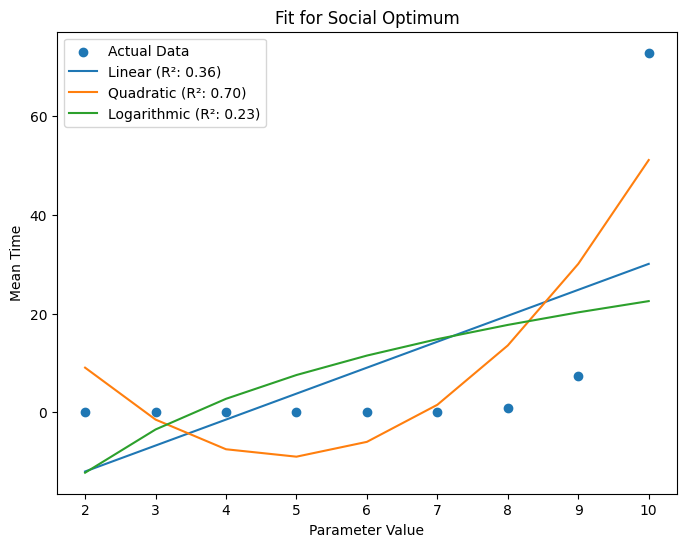

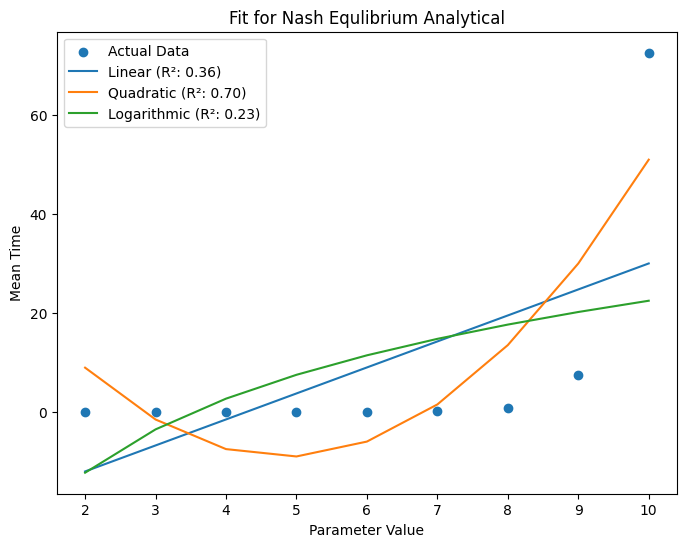

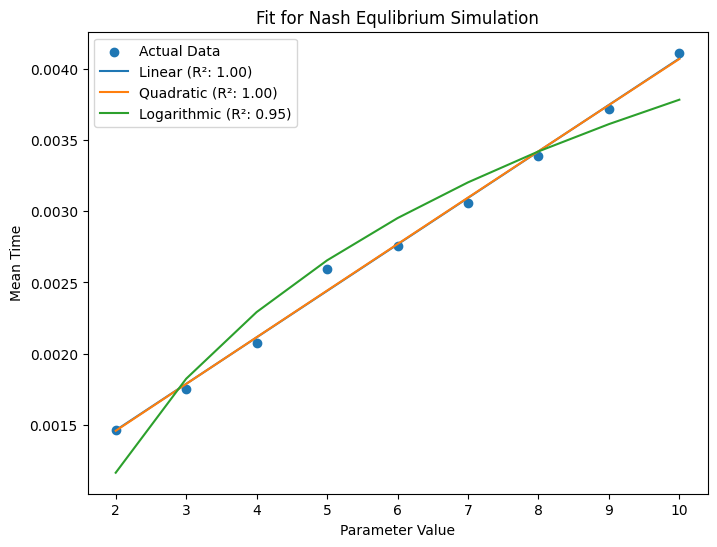

In [80]:
plot_results(results_single_path, all_predicted_y_single_path, r2_scores_single_path)

## Double Path

In [82]:
r2_scores_double_path, all_predicted_y_double_path = fit_models_and_calculate_r2(results_two_path)

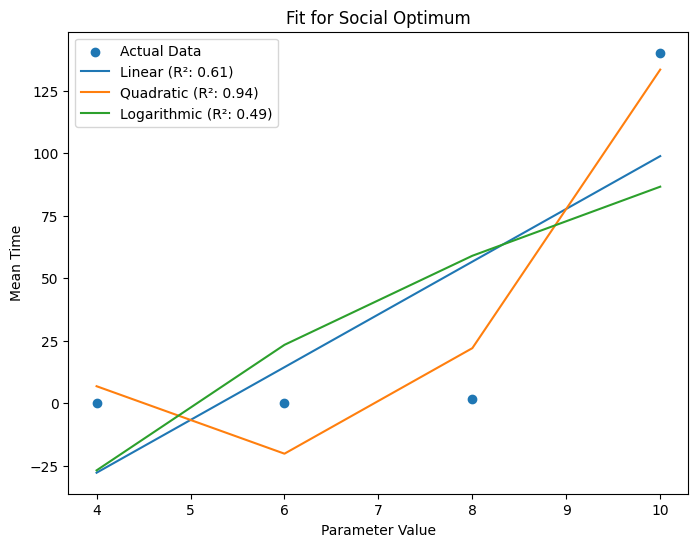

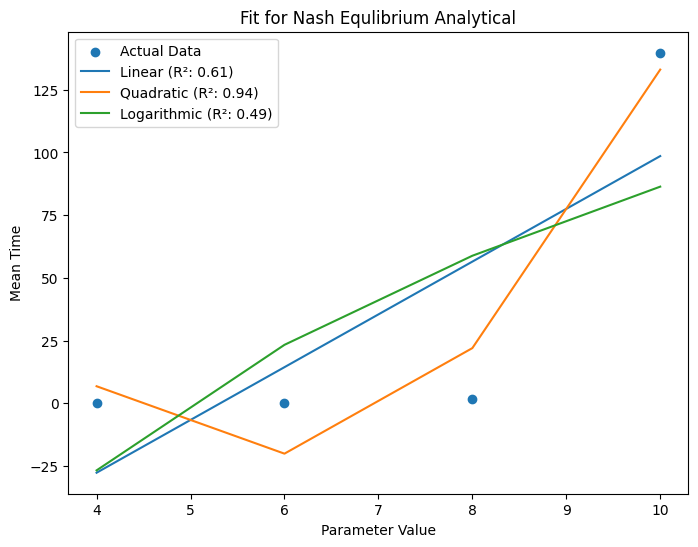

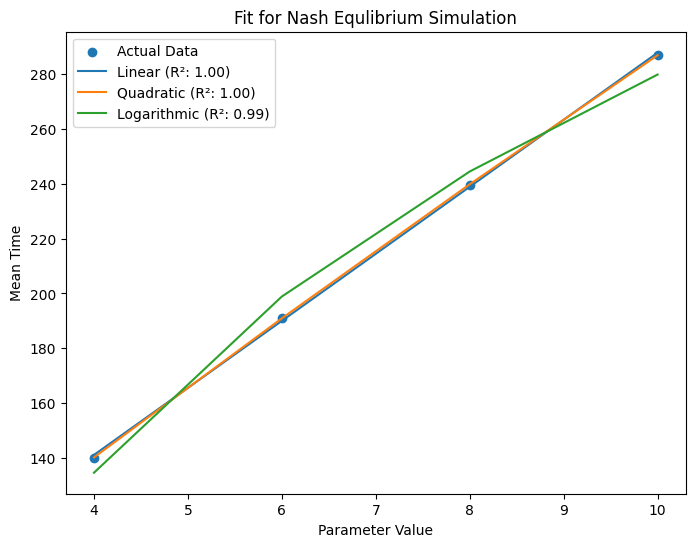

In [83]:
plot_results(results_two_path, all_predicted_y_double_path, r2_scores_double_path)

In [87]:
df_r2_scores = pd.DataFrame(r2_scores_double_path).T
df_r2_scores.index.name = 'Optimization Problem'
df_r2_scores.columns.name = 'Algorithm'
df_r2_scores

Algorithm,Linear,Quadratic,Logarithmic
Optimization Problem,,,
so,0.609791,0.937537,0.492812
ne-analytical,0.609991,0.937630,0.493004
ne,0.999717,0.999998,0.986193


In [90]:
def plot_time_diff(results):
    df_data = pd.DataFrame([
        {
            'Complexity': complexity,
            'Edges': details['edges'],
            'Mean Time': details['mean']
        }
        for complexity, complexities in results.items()
        for _, details in complexities.items()
    ])
    
    # Pivot the DataFrame for plotting
    df_pivot = df_data.pivot(index='Edges', columns='Complexity', values='Mean Time')
    
    # Plotting
    df_pivot.plot(kind='bar', figsize=(10, 6))
    
    plt.title('Mean Time by Number of Edges for Different Complexities')
    plt.xlabel('Number of Edges')
    plt.ylabel('Mean Time')
    plt.xticks(rotation=0)
    plt.legend(title='Complexity')
    plt.show()

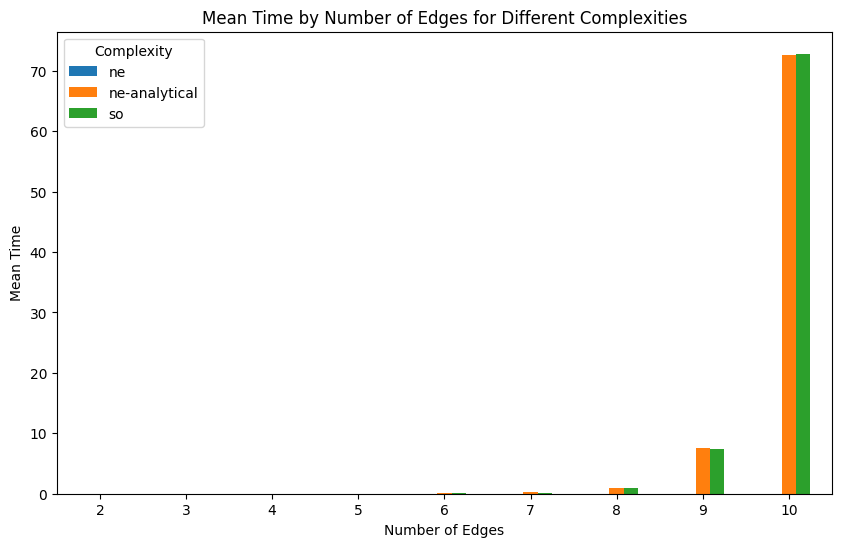

In [93]:
plot_time_diff(results_single_path)

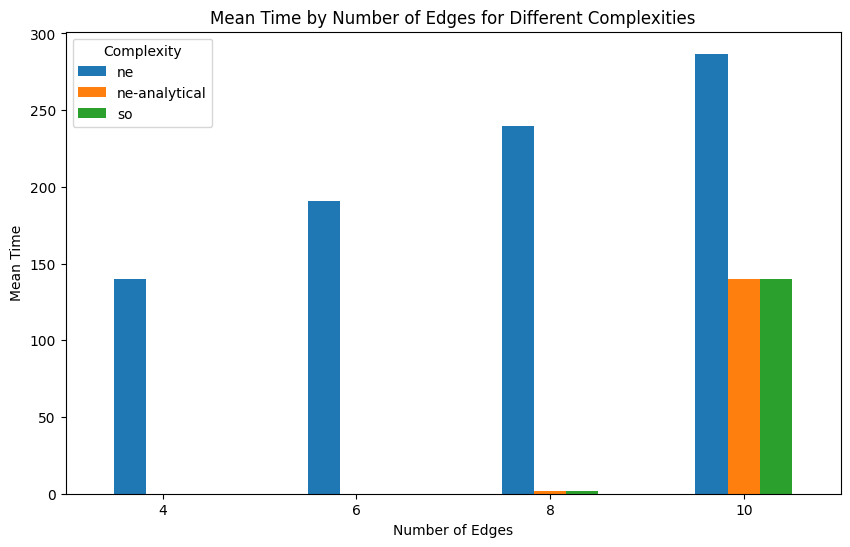

In [92]:
plot_time_diff(results_two_path)